In [1]:
from matplotlib import pyplot as pylt
import pandas as pd
import numpy as np
from collections import defaultdict
from scipy import stats

In [58]:
df = pd.read_csv('C:/Users/simon/Desktop/Ergebnisse/mesh_01.csv')


In [3]:
df.head()

,dir,ecLF,ccLF,icLF,ecMF,ccMF,icMF,pLF,pMF,aLF,...,iMT.aMiv,aLT.aSD,aLT.aMav,aLT.aMiv,aMT.aSD,aMT.aMav,aMT.aMiv,eLT.aSD,eLT.aMav,eLT.aMiv
0,9162498,1.512342,2.331075,1.488530,2.089731,2.757877,1.905267,2.309803,2.288954,2.154454,...,0.411395,0.313820,1.287818,0.263913,0.425574,2.141450,0.651671,0.401328,2.104061,0.803592
1,9211751,1.351034,2.331421,1.805596,1.968512,2.771100,1.939571,2.322438,2.303944,2.333359,...,0.679028,0.334378,1.593265,0.430302,0.544583,2.259020,0.502452,0.425046,1.800617,0.398860
2,9230284,1.370241,2.259759,1.284374,1.626626,1.885604,1.374738,2.356530,1.691659,2.648007,...,0.890167,0.413843,1.991968,0.551664,0.780076,2.895855,0.489251,0.541212,1.937093,0.340253
3,9156526,1.221672,1.940543,1.463180,1.286630,2.187528,1.954018,2.124055,1.953982,1.747326,...,0.431305,0.261216,1.134097,0.266233,0.542893,2.097518,0.362090,0.338252,1.417087,0.355575
4,9197994,1.798187,2.861074,1.584878,2.075490,3.276695,2.144264,2.199913,2.627461,2.238242,...,0.765899,0.342805,1.336069,0.275480,0.667486,3.332072,1.179033,0.558112,1.855852,0.374765


Fill NaN values with overall dataset mean.

In [4]:
#print(f'Filling {df[df.isna().any(axis=1)].shape[0]} instances containing NaN values.')

In [5]:
#d = defaultdict()
#for column in df.columns:
#    d[column] = df[column].mean()

In [6]:
#df.fillna(value=d, inplace=True)

Filter out extreme outliers (deviating more than 5 standard deviations from the mean).


In [59]:
numrows = df.shape[0]
df = df[(np.abs(stats.zscore(df)) < 5).all(axis=1)]
print(f'Filtered out {numrows - df.shape[0]} instances.')

Filtered out 8 instances.


In [8]:
#df = df.loc[df['dir'] != 9189303].loc[df['dir'] != 9539084]

In [9]:
df.columns

Index(['dir', 'ecLF', 'ccLF', 'icLF', 'ecMF', 'ccMF', 'icMF', 'pLF', 'pMF',
       'aLF', 'aMF', 'icLF.aSD', 'icLF.aMav', 'icLF.aMiv', 'pMF.aSD',
       'pMF.aMav', 'pMF.aMiv', 'pLF.aSD', 'pLF.aMav', 'pLF.aMiv', 'ccLF.aSD',
       'ccLF.aMav', 'ccLF.aMiv', 'ccMF.aSD', 'ccMF.aMav', 'ccMF.aMiv',
       'icMF.aSD', 'icMF.aMav', 'icMF.aMiv', 'aMF.aSD', 'aMF.aMav', 'aMF.aMiv',
       'aLF.aSD', 'aLF.aMav', 'aLF.aMiv', 'ecLF.aSD', 'ecLF.aMav', 'ecLF.aMiv',
       'ecMF.aSD', 'ecMF.aMav', 'ecMF.aMiv', 'cLT', 'aLT', 'eLT', 'pLT', 'iLT',
       'cMT', 'aMT', 'eMT', 'pMT', 'iMT', 'pMT.aSD', 'pMT.aMav', 'pMT.aMiv',
       'pLT.aSD', 'pLT.aMav', 'pLT.aMiv', 'iLT.aSD', 'iLT.aMav', 'iLT.aMiv',
       'cLT.aSD', 'cLT.aMav', 'cLT.aMiv', 'cMT.aSD', 'cMT.aMav', 'cMT.aMiv',
       'eMT.aSD', 'eMT.aMav', 'eMT.aMiv', 'iMT.aSD', 'iMT.aMav', 'iMT.aMiv',
       'aLT.aSD', 'aLT.aMav', 'aLT.aMiv', 'aMT.aSD', 'aMT.aMav', 'aMT.aMiv',
       'eLT.aSD', 'eLT.aMav', 'eLT.aMiv'],
      dtype='object')

In [10]:
eclf = df['ecLF']
cclf = df['ccLF']
iclf = df['icLF']
icmf = df['icMF']
ccmf = df['ccMF']
ecmf = df['ecMF']

elt = df['eLT']
plt = df['pLT']
ilt = df['iLT']
alt = df['aLT']
clt = df['cLT']

emt = df['eMT']
pmt = df['pMT']
imt = df['iMT']
amt = df['aMT']
cmt = df['cMT']

plf = df['pLF']
pmf = df['pMF']
alf = df['aLF']
amf = df['aMF']

In [11]:
xs = np.arange(0, df.shape[0])
len(xs)

161

## Subregion scatters

### Femur

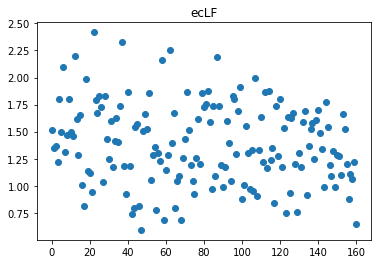

In [12]:
ys = eclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ecLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

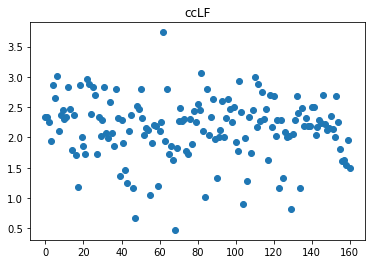

In [13]:
ys = cclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ccLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

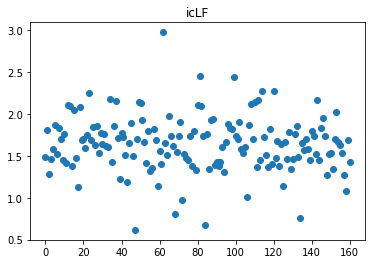

In [14]:
ys = iclf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('icLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

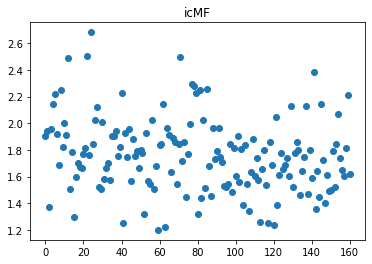

In [15]:
ys = icmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('icMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

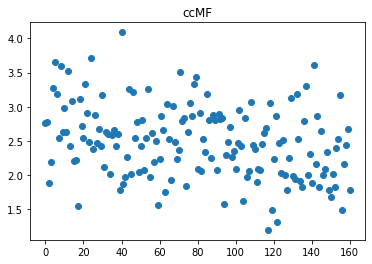

In [16]:
ys = ccmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ccMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

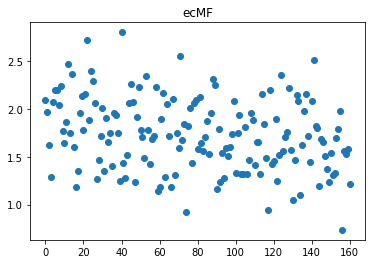

In [17]:
ys = ecmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('ecMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

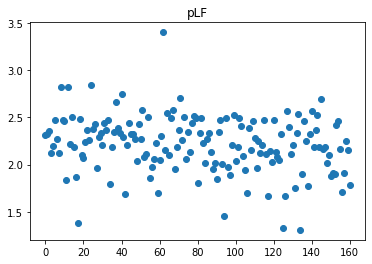

In [18]:
ys = plf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('pLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

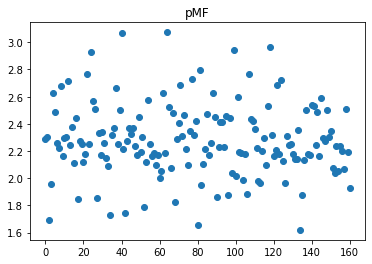

In [19]:
ys = pmf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('pMF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

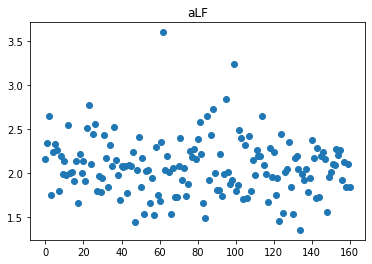

In [20]:
ys = alf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aLF')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

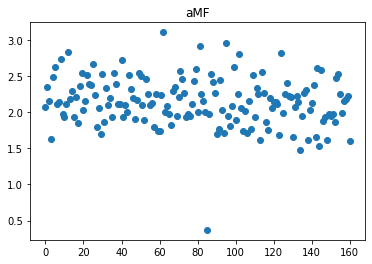

In [21]:
ys = amf.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aMF')
for i in range(len(xs)):
    pass

### Tibia

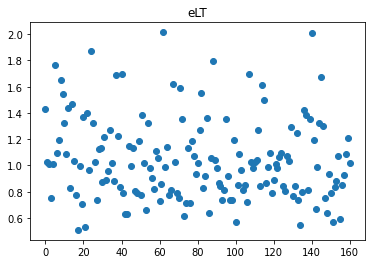

In [22]:
ys = elt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('eLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

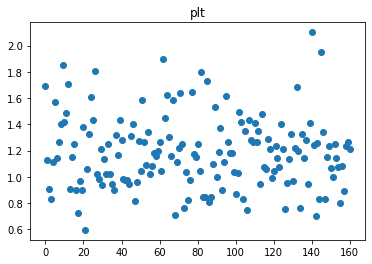

In [23]:
ys = plt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('plt')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

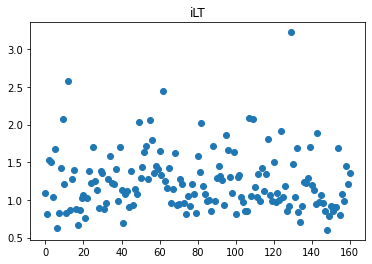

In [24]:
ys = ilt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('iLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

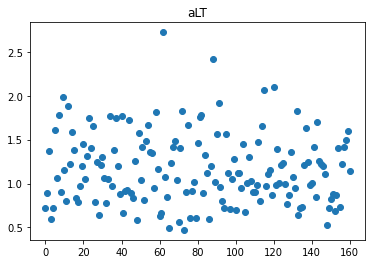

In [25]:
ys = alt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

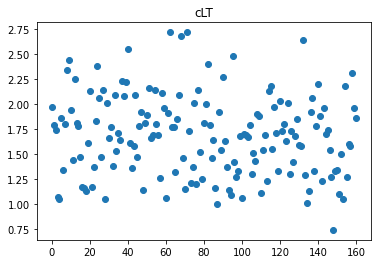

In [26]:
ys = clt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('cLT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

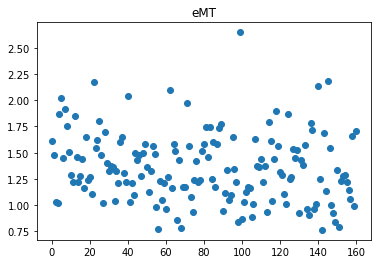

In [27]:
ys = emt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('eMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

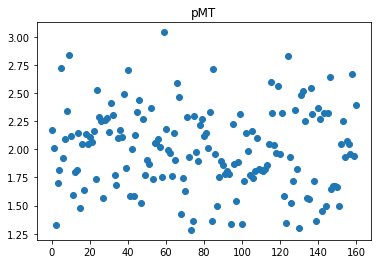

In [28]:
ys = pmt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('pMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

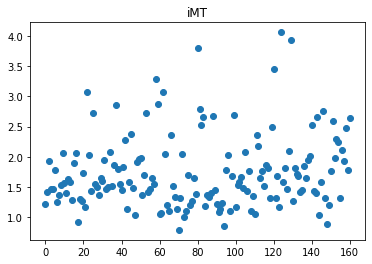

In [29]:
ys = imt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('iMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

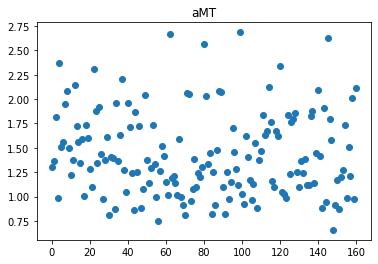

In [30]:
ys = amt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('aMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

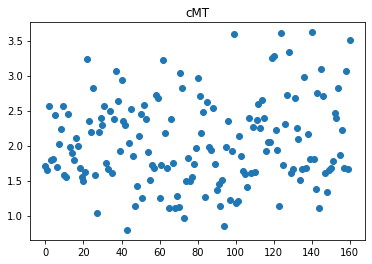

In [31]:
ys = cmt.to_numpy()
pylt.scatter(x=xs, y=ys)
pylt.title('cMT')
for i in range(len(xs)):
    pass
    # pylt.text(xs[i], ys[i], i)

## Subregion boxplots

### Femur

Text(0.5, 1.0, 'ecLF')

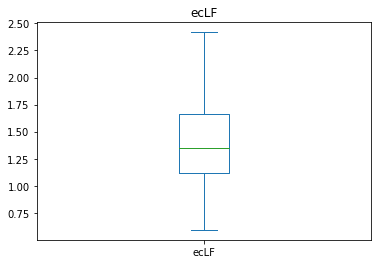

In [32]:
ys = eclf.to_numpy()
eclf.plot.box()
#pylt.boxplot(ys)
q1 = eclf.quantile(.25)
q3 = eclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - eclf.median()):.2f} total deviation from median)')
        
pylt.title('ecLF')

Segmentation 9988421.0 is an outlier (1.55 total deviation from median)
Segmentation 9995338.0 is an outlier (1.17 total deviation from median)
Segmentation 9606490.0 is an outlier (1.52 total deviation from median)
Segmentation 9905024.0 is an outlier (1.75 total deviation from median)
Segmentation 9486827.0 is an outlier (1.21 total deviation from median)
Segmentation 9355112.0 is an outlier (1.33 total deviation from median)
Segmentation 9052956.0 is an outlier (1.39 total deviation from median)


Text(0.5, 1.0, 'ccLF')

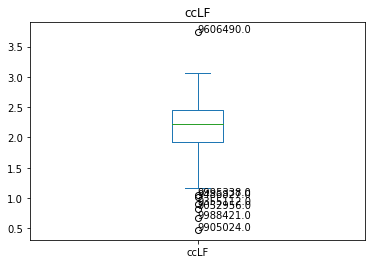

In [33]:
ys = cclf.to_numpy()
cclf.plot.box()
#pylt.boxplot(ys)
q1 = cclf.quantile(.25)
q3 = cclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - cclf.median()):.2f} total deviation from median)')
        
pylt.title('ccLF')

Segmentation 9988421.0 is an outlier (1.04 total deviation from median)
Segmentation 9606490.0 is an outlier (1.32 total deviation from median)
Segmentation 9905024.0 is an outlier (0.86 total deviation from median)
Segmentation 9467252.0 is an outlier (0.79 total deviation from median)
Segmentation 9486827.0 is an outlier (0.99 total deviation from median)
Segmentation 9302260.0 is an outlier (0.78 total deviation from median)
Segmentation 9036770.0 is an outlier (0.90 total deviation from median)


Text(0.5, 1.0, 'icLF')

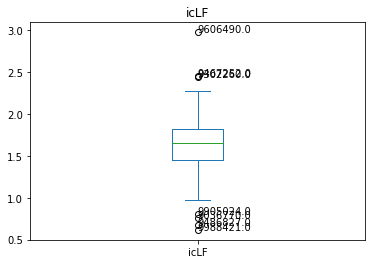

In [34]:
ys = iclf.to_numpy()
iclf.plot.box()
#pylt.boxplot(ys)
q1 = iclf.quantile(.25)
q3 = iclf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - iclf.median()):.2f} total deviation from median)')
        
pylt.title('icLF')

Segmentation 9223980.0 is an outlier (0.74 total deviation from median)
Segmentation 9222973.0 is an outlier (0.76 total deviation from median)
Segmentation 9180558.0 is an outlier (0.94 total deviation from median)
Segmentation 9766939.0 is an outlier (0.75 total deviation from median)


Text(0.5, 1.0, 'icMF')

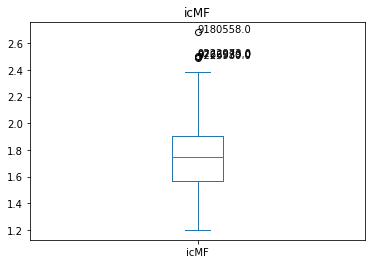

In [35]:
ys = icmf.to_numpy()
icmf.plot.box()
#pylt.boxplot(ys)
q1 = icmf.quantile(.25)
q3 = icmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - icmf.median()):.2f} total deviation from median)')
        
pylt.title('icMF')

Segmentation 9241424.0 is an outlier (1.61 total deviation from median)


Text(0.5, 1.0, 'ccMF')

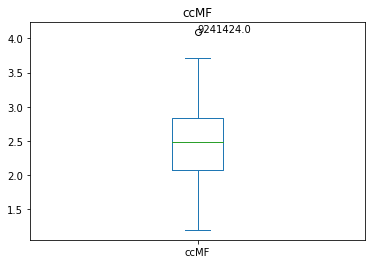

In [36]:
ys = ccmf.to_numpy()
ccmf.plot.box()
#pylt.boxplot(ys)
q1 = ccmf.quantile(.25)
q3 = ccmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ccmf.median()):.2f} total deviation from median)')
        
pylt.title('ccMF')

Text(0.5, 1.0, 'ecMF')

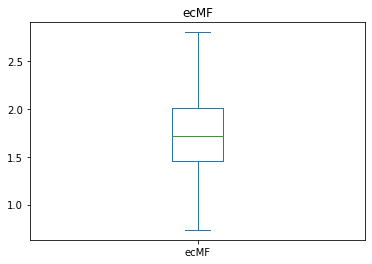

In [37]:
ys = ecmf.to_numpy()
ecmf.plot.box()
#pylt.boxplot(ys)
q1 = ecmf.quantile(.25)
q3 = ecmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ecmf.median()):.2f} total deviation from median)')
        
pylt.title('ecMF')

Segmentation 9211049.0 is an outlier (0.85 total deviation from median)
Segmentation 9606490.0 is an outlier (1.17 total deviation from median)
Segmentation 9504627.0 is an outlier (0.78 total deviation from median)
Segmentation 9120941.0 is an outlier (0.90 total deviation from median)
Segmentation 9036770.0 is an outlier (0.92 total deviation from median)


Text(0.5, 1.0, 'pLF')

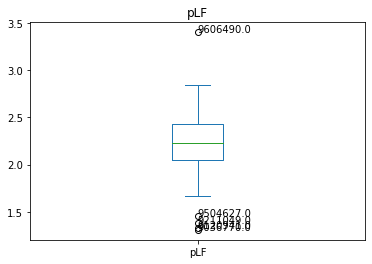

In [38]:
ys = plf.to_numpy()
plf.plot.box()
#pylt.boxplot(ys)
q1 = plf.quantile(.25)
q3 = plf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - plf.median()):.2f} total deviation from median)')
        
pylt.title('pLF')

Segmentation 9230284.0 is an outlier (0.56 total deviation from median)
Segmentation 9180558.0 is an outlier (0.68 total deviation from median)
Segmentation 9241424.0 is an outlier (0.82 total deviation from median)
Segmentation 9879069.0 is an outlier (0.82 total deviation from median)
Segmentation 9458093.0 is an outlier (0.59 total deviation from median)
Segmentation 9302260.0 is an outlier (0.69 total deviation from median)
Segmentation 9273362.0 is an outlier (0.72 total deviation from median)
Segmentation 9036770.0 is an outlier (0.63 total deviation from median)


Text(0.5, 1.0, 'pMF')

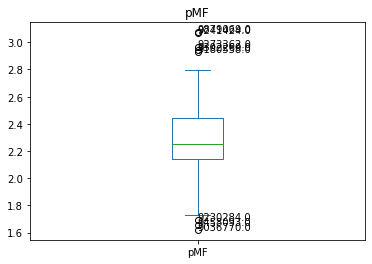

In [39]:
ys = pmf.to_numpy()
pmf.plot.box()
#pylt.boxplot(ys)
q1 = pmf.quantile(.25)
q3 = pmf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - pmf.median()):.2f} total deviation from median)')
        
pylt.title('pMF')

Segmentation 9606490.0 is an outlier (1.55 total deviation from median)
Segmentation 9504056.0 is an outlier (0.79 total deviation from median)
Segmentation 9302260.0 is an outlier (1.19 total deviation from median)


Text(0.5, 1.0, 'aLF')

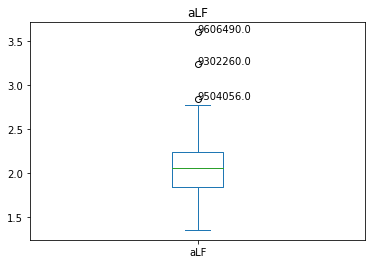

In [40]:
ys = alf.to_numpy()
alf.plot.box()
#pylt.boxplot(ys)
q1 = alf.quantile(.25)
q3 = alf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - alf.median()):.2f} total deviation from median)')
        
pylt.title('aLF')

Segmentation 9606490.0 is an outlier (0.97 total deviation from median)
Segmentation 9474901.0 is an outlier (1.77 total deviation from median)
Segmentation 9504056.0 is an outlier (0.82 total deviation from median)


Text(0.5, 1.0, 'aMF')

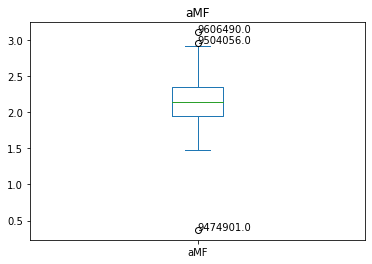

In [41]:
ys = amf.to_numpy()
amf.plot.box()
#pylt.boxplot(ys)
q1 = amf.quantile(.25)
q3 = amf.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - amf.median()):.2f} total deviation from median)')
        
pylt.title('aMF')

### Tibia

Segmentation 9180558.0 is an outlier (0.86 total deviation from median)
Segmentation 9606490.0 is an outlier (1.00 total deviation from median)
Segmentation 9003430.0 is an outlier (1.00 total deviation from median)


Text(0.5, 1.0, 'eLT')

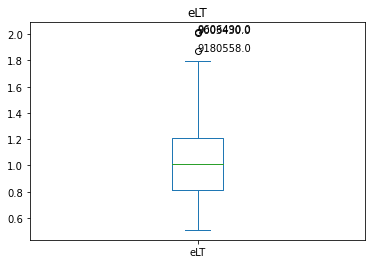

In [42]:
ys = elt.to_numpy()
elt.plot.box()
#pylt.boxplot(ys)
q1 = elt.quantile(.25)
q3 = elt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - elt.median()):.2f} total deviation from median)')
        
pylt.title('eLT')

Segmentation 9238060.0 is an outlier (0.69 total deviation from median)
Segmentation 9606490.0 is an outlier (0.73 total deviation from median)
Segmentation 9003430.0 is an outlier (0.94 total deviation from median)
Segmentation 9115742.0 is an outlier (0.79 total deviation from median)


Text(0.5, 1.0, 'pLT')

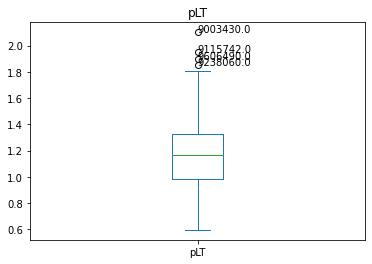

In [43]:
ys = plt.to_numpy()
plt.plot.box()
#pylt.boxplot(ys)
q1 = plt.quantile(.25)
q3 = plt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - plt.median()):.2f} total deviation from median)')
        
pylt.title('pLT')

Segmentation 9223980.0 is an outlier (1.42 total deviation from median)
Segmentation 9606490.0 is an outlier (1.29 total deviation from median)
Segmentation 9052956.0 is an outlier (2.07 total deviation from median)


Text(0.5, 1.0, 'iLT')

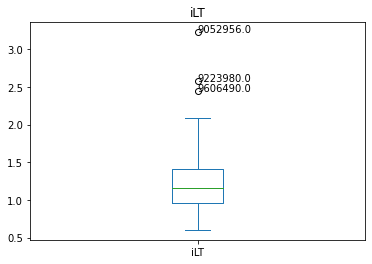

In [44]:
ys = ilt.to_numpy()
ilt.plot.box()
#pylt.boxplot(ys)
q1 = ilt.quantile(.25)
q3 = ilt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - ilt.median()):.2f} total deviation from median)')
        
pylt.title('iLT')

Segmentation 9606490.0 is an outlier (1.61 total deviation from median)
Segmentation 9471287.0 is an outlier (1.31 total deviation from median)


Text(0.5, 1.0, 'aLT')

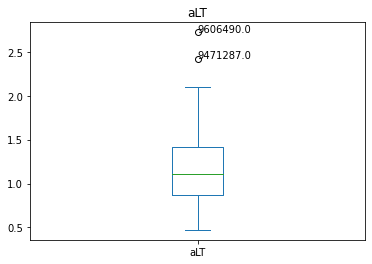

In [45]:
ys = alt.to_numpy()
alt.plot.box()
#pylt.boxplot(ys)
q1 = alt.quantile(.25)
q3 = alt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - alt.median()):.2f} total deviation from median)')
        
pylt.title('aLT')

Text(0.5, 1.0, 'cLT')

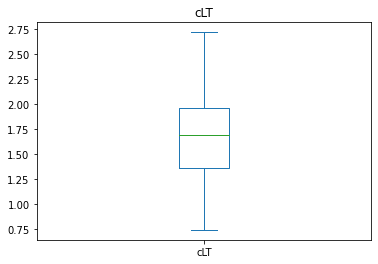

In [46]:
ys = clt.to_numpy()
clt.plot.box()
#pylt.boxplot(ys)
q1 = clt.quantile(.25)
q3 = clt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - clt.median()):.2f} total deviation from median)')
        
pylt.title('cLT')

Segmentation 9302260.0 is an outlier (1.33 total deviation from median)


Text(0.5, 1.0, 'eMT')

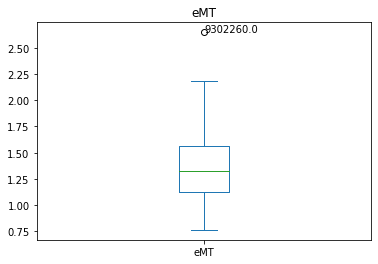

In [47]:
ys = emt.to_numpy()
emt.plot.box()
#pylt.boxplot(ys)
q1 = emt.quantile(.25)
q3 = emt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - emt.median()):.2f} total deviation from median)')
        
pylt.title('eMT')

Segmentation 9862541.0 is an outlier (1.05 total deviation from median)


Text(0.5, 1.0, 'pMT')

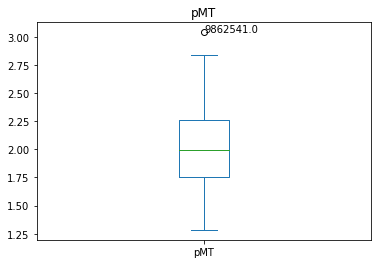

In [48]:
ys = pmt.to_numpy()
pmt.plot.box()
#pylt.boxplot(ys)
q1 = pmt.quantile(.25)
q3 = pmt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - pmt.median()):.2f} total deviation from median)')
        
pylt.title('pMT')

Segmentation 9222973.0 is an outlier (1.49 total deviation from median)
Segmentation 9925594.0 is an outlier (1.70 total deviation from median)
Segmentation 9606490.0 is an outlier (1.49 total deviation from median)
Segmentation 9458093.0 is an outlier (2.21 total deviation from median)
Segmentation 9122643.0 is an outlier (1.87 total deviation from median)
Segmentation 9035647.0 is an outlier (2.47 total deviation from median)
Segmentation 9052956.0 is an outlier (2.35 total deviation from median)


Text(0.5, 1.0, 'iMT')

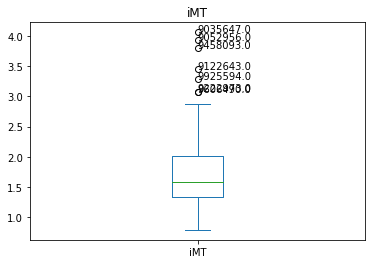

In [49]:
ys = imt.to_numpy()
imt.plot.box()
#pylt.boxplot(ys)
q1 = imt.quantile(.25)
q3 = imt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - imt.median()):.2f} total deviation from median)')
        
pylt.title('iMT')

Segmentation 9606490.0 is an outlier (1.31 total deviation from median)
Segmentation 9302260.0 is an outlier (1.32 total deviation from median)


Text(0.5, 1.0, 'aMT')

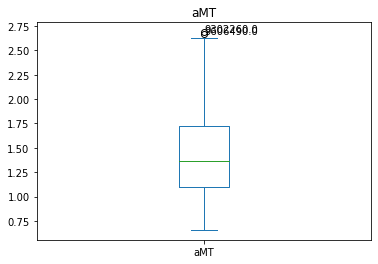

In [50]:
ys = amt.to_numpy()
amt.plot.box()
#pylt.boxplot(ys)
q1 = amt.quantile(.25)
q3 = amt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - amt.median()):.2f} total deviation from median)')
        
pylt.title('aMT')

Text(0.5, 1.0, 'cMT')

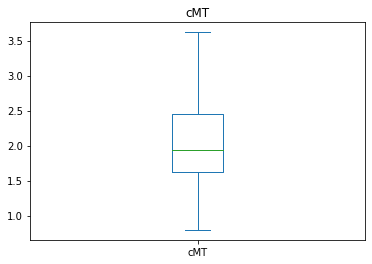

In [51]:
ys = cmt.to_numpy()
cmt.plot.box()
#pylt.boxplot(ys)
q1 = cmt.quantile(.25)
q3 = cmt.quantile(.75)
ot = q3 + 1.5 * (q3 - q1)
ob = q1 - 1.5 * (q3 - q1)
for i, y in enumerate(ys):
    if y > ot or y < ob:
        pylt.text(1, y, df.iloc[i]['dir'])
        print(f'Segmentation {df.iloc[i]["dir"]} is an outlier ({abs(y - cmt.median()):.2f} total deviation from median)')
        
pylt.title('cMT')

<AxesSubplot:>

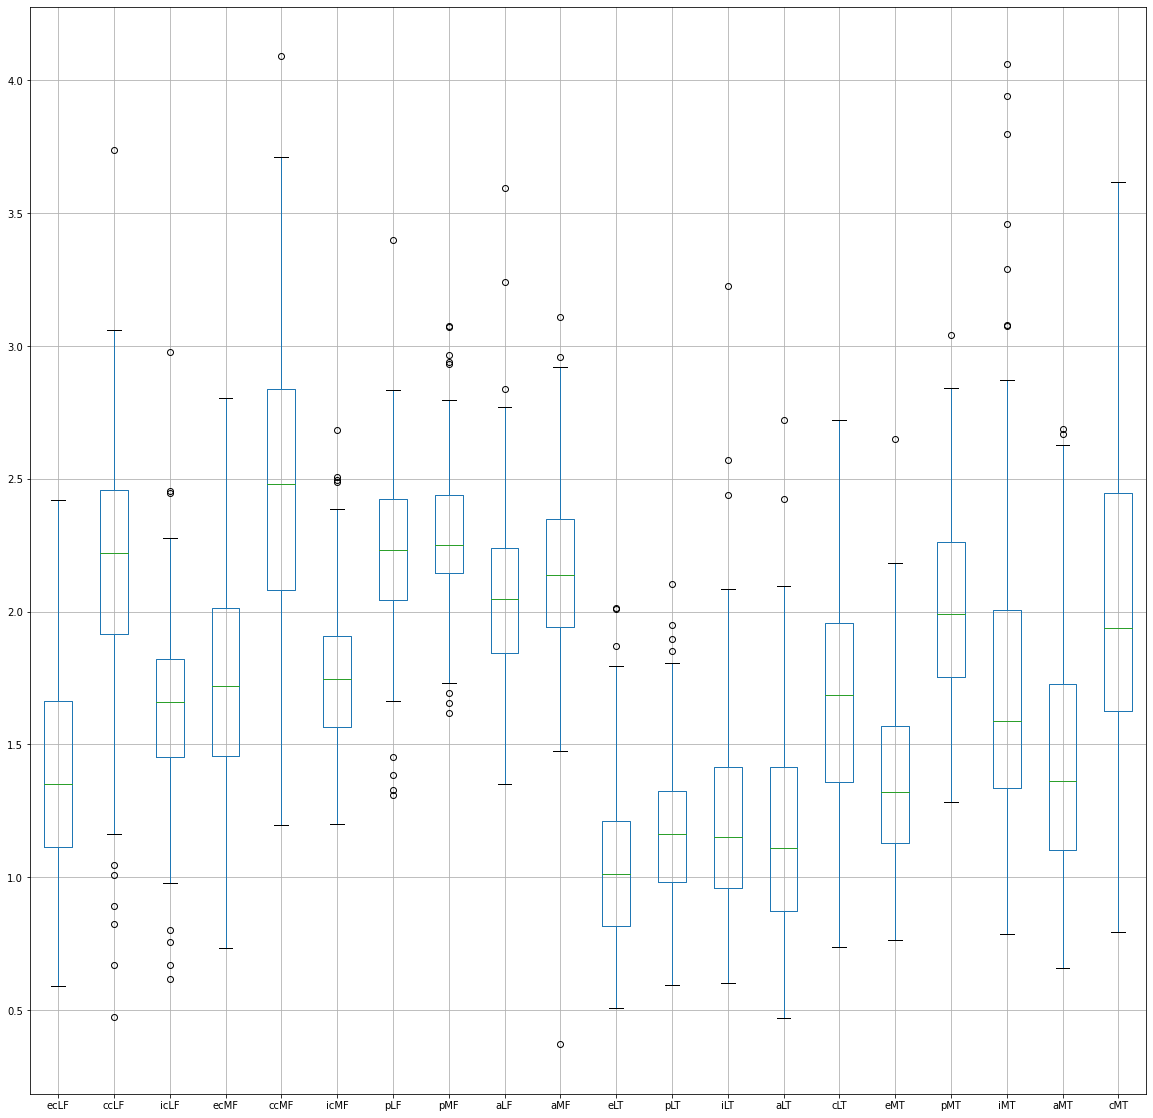

In [52]:
df.boxplot(column=['ecLF', 'ccLF', 'icLF', 'ecMF', 'ccMF', 'icMF', 'pLF', 'pMF',
       'aLF', 'aMF', 'eLT', 'pLT', 'iLT', 'aLT', 'cLT', 'eMT', 'pMT', 'iMT', 'aMT',
       'cMT'], figsize=(20,20))